# Graph Maker for Mid-Term Data Structures and Algorithums


Author: Joshua Roberge

In [51]:
import subprocess
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Running and Gathering Results for C Implementation

In [53]:
def get_c_fib(start, end):
    """
    Runs the C implementation of Fibonacci and and then writes the results to a CSV file.
    """
    results = []
    for i in range(start, end + 1):
        result = subprocess.run(['../c_fib/main.out', '-a', '4','-f', str(i)], capture_output=True, text=True)
        results.append(result.stdout.strip().split(","))
    
    df = pd.DataFrame(results, 
                  columns=["Fibonacci Number", "Itterative", "Recrusive", "Dynamic"]
                  )
    df["Fibonacci Number"] = df["Fibonacci Number"].astype(str)
    df[["Itterative", "Recrusive", "Dynamic"]] = df[["Itterative", "Recrusive", "Dynamic"]].astype(float)
    df.to_csv("results/c_fib_results.csv", index=False)

    return results
    

results = get_c_fib(0,10)

### Running and Gathering Results for Python Implementation

In [ ]:
def get_python_fib(start, end):
    """
    Runs the Python implementation of Fibonacci and and then writes the results to a CSV file.
    """
    results = []
    for i in range(start, end + 1):
        result = subprocess.run(['python3', '../python_fib/main.py', "-a", "4", "-f", str(i)], capture_output=True, text=True)
        results.append(result.stdout.strip().split(","))
    
    df = pd.DataFrame(results, 
                  columns=["Fibonacci Number", "Itterative", "Recrusive", "Dynamic"]
                  )
    df["Fibonacci Number"] = df["Fibonacci Number"].astype(str)
    df[["Itterative", "Recrusive", "Dynamic"]] = df[["Itterative", "Recrusive", "Dynamic"]].astype(float)
    df.to_csv("results/python_fib_results.csv", index=False)

    return results

get_python_fib(0,10)

[['f_0', '0.0000004768', '0.0000004768', '0.0000002384'],
 ['f_1', '0.0000009537', '0.0000007153', '0.0000002384'],
 ['f_2', '0.0000009537', '0.0000014305', '0.0000014305'],
 ['f_3', '0.0000011921', '0.0000019073', '0.0000023842'],
 ['f_4', '0.0000009537', '0.0000021458', '0.0000023842'],
 ['f_5', '0.0000009537', '0.0000021458', '0.0000023842'],
 ['f_6', '0.0000011921', '0.0000028610', '0.0000026226'],
 ['f_7', '0.0000009537', '0.0000030994', '0.0000026226'],
 ['f_8', '0.0000011921', '0.0000045300', '0.0000028610'],
 ['f_9', '0.0000009537', '0.0000054836', '0.0000028610'],
 ['f_10', '0.0000009537', '0.0000081062', '0.0000028610']]

# Make Graphs

Text(0.5, 0, 'Fibonacci Number')

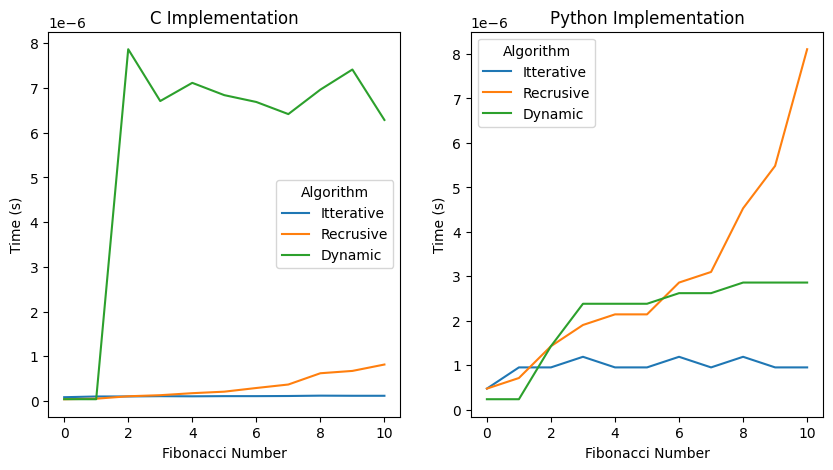

In [74]:
#read in results
c_df = pd.read_csv("results/c_fib_results.csv")
py_df = pd.read_csv("results/python_fib_results.csv")

c_df["Fibonacci Number"] = c_df.index
py_df["Fibonacci Number"] = py_df.index
c_df["Program"] = "C"
py_df["Program"] = "Python"

df = pd.concat([c_df, py_df])
df = df.melt(id_vars=["Program", "Fibonacci Number"], var_name="Algorithm", value_name="Time (s)")

c_df = df[df["Program"] == "C"]
py_df = df[df["Program"] == "Python"]



fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.lineplot(x=c_df["Fibonacci Number"], y=c_df["Time (s)"], hue=df["Algorithm"], ax=axes[0])
axes[0].set_title("C Implementation")
axes[0].set_ylabel("Time (s)")
axes[0].set_xlabel("Fibonacci Number")

sns.lineplot(x=py_df["Fibonacci Number"], y=py_df["Time (s)"], hue=df["Algorithm"], ax=axes[1])
axes[1].set_title("Python Implementation")
axes[1].set_ylabel("Time (s)")
axes[1].set_xlabel("Fibonacci Number")

In [70]:
c_df

,Fibonacci Number,Itterative,Recrusive,Dynamic,,Program
0,0,8.600000e-08,4.100000e-08,4.200000e-08,C,C
1,1,1.020000e-07,5.300000e-08,4.100000e-08,C,C
2,2,1.030000e-07,1.070000e-07,7.869000e-06,C,C
3,3,1.090000e-07,1.310000e-07,6.710000e-06,C,C
4,4,1.060000e-07,1.760000e-07,7.117000e-06,C,C
5,5,1.100000e-07,2.100000e-07,6.842000e-06,C,C
6,6,1.100000e-07,2.920000e-07,6.689000e-06,C,C
7,7,1.130000e-07,3.700000e-07,6.418000e-06,C,C
8,8,1.210000e-07,6.220000e-07,6.965000e-06,C,C
9,9,1.180000e-07,6.740000e-07,7.415000e-06,C,C


In [ ]:
df = pd.DataFrame(results, 
                  columns=["Fibonacci Number", "Itterative", "Recrusive", "Dynamic"]
                  )
df["Fibonacci Number"] = df["Fibonacci Number"].astype(str)
df[["Itterative", "Recrusive", "Dynamic"]] = df[["Itterative", "Recrusive", "Dynamic"]].astype(float)
df.to_csv("c_fib_results.csv", index=False)

,Fibonacci Number,Itterative,Recrusive,Dynamic
0,f_0,8.800000e-08,4.200000e-08,4.300000e-08
1,f_1,9.900000e-08,5.600000e-08,4.100000e-08
2,f_2,1.150000e-07,1.070000e-07,6.617000e-06
3,f_3,1.050000e-07,1.310000e-07,6.049000e-06
4,f_4,1.090000e-07,1.760000e-07,7.201000e-06
5,f_5,1.090000e-07,2.110000e-07,6.590000e-06
6,f_6,1.080000e-07,3.130000e-07,5.846000e-06
7,f_7,1.140000e-07,4.170000e-07,8.061000e-06
8,f_8,1.150000e-07,4.260000e-07,6.380000e-06
9,f_9,1.120000e-07,5.570000e-07,6.361000e-06
